In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

In [85]:
def separe_en_caracteres_local(image_binary : np, indices_debut_fin_ligne : tuple, taux=0.05) -> list :

    """
    Description : Prends en entrée une ligne de texte dans une image et renvoie les indice de colonnes de début et de fin de chaque caractère
                  
                  Le but est d'obtenir le taux de pixel noirs de chaque colonne. 
                  On crée un dictionnaire stockant le nombre de pixels noirs par colonne (en parcourant l'image).
                  On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne.

                  On conserve seulement ceux qui sont supérieus à un certain taux et on les garde dans ue liste.
                  Nous avons donc une liste de plusieurs plages continues de données mais les plages ne sont pas continues entre elles.
                  On va donc récupérer les indices de début et de fin de chaque plage de données continues.
                  Ce qui représente les indices de début et de fin de chaque caractères de la ligne.

    Exemple : >>> ranges = separe_en_lignes(image)
                  ranges = [ (0, 21), (25, 65), ...]

    Inputs : - image_binary (np) : la verion binarisée de l'image dont on veut extraire les carctères
             - indices_debut_fin_ligne (tuple) : les indices de début et de fin de la ligne dont on veut extraire les caractères
             - taux (float) : fixé de base à 0.05, permet de spérarer les colonnes de pixel contenant de l'information ou non

    Output : (ranges) list : une liste de tuples des indices de colonnes de début et de fin de chaque caractère pour la ligne entrée
    """
   
    # Définition de l'image binarisée de la ligne voulue
    h = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1]]

    # Création d'un dictionnaire stockant le nombre de pixels noirs par colonne
    dictionnaire = {}
    for k in range(len(h[0])) :
        dictionnaire[k] = 0

    for i in range(len(h)) :
        for j in range(len(h[i])) :
            if h[i][j] == 0 :
                dictionnaire[j] += 1
    # On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne
    for num_colonne in dictionnaire.keys() :
        dictionnaire[num_colonne] /= len(h)

    # On conserve dans une liste ceux qui ont un taux >= 0.05
    indices = []
    for elt in dictionnaire.keys() :
        if dictionnaire[elt] >= taux :
            indices.append(elt)

    # Obtenir des plages continues de pixels représentant les caractères en rajoutant un peu d'espace entre les caractères pour ne pas qu'ils soient sérrés dans leurs cases
    d = np.diff(indices)
    espaces =[int(val/2) for val in d if val > 1]
    
    ranges = []
    start = indices[0]
    indices_espaces = 0
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            if indices_espaces >= 1 :
                val_avant = espaces[indices_espaces-1] 
            else :
                val_avant = espaces[indices_espaces]
            val_apres = espaces[indices_espaces]
            ranges.append((start-val_avant, indices[i - 1]+val_apres))
            start = indices[i]
            indices_espaces += 1
    ranges.append((start-val_avant, indices[-1]+val_avant))

    return ranges

In [91]:
image = cv2.imread('scan_niv_gris_300ppp_fiche_polices.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

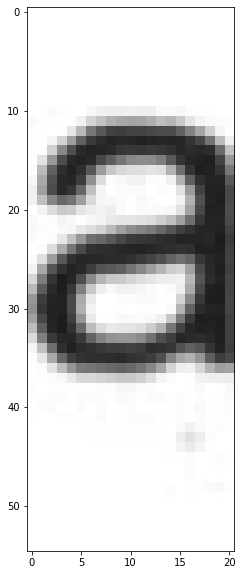

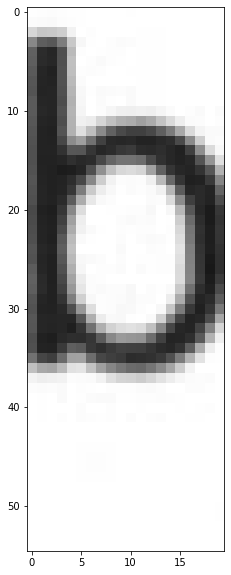

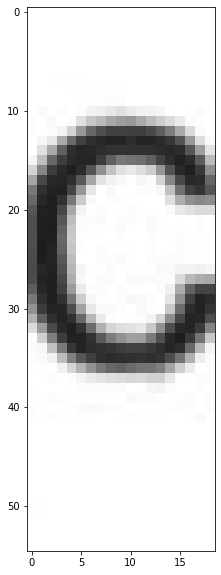

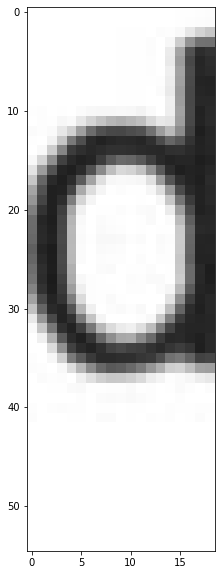

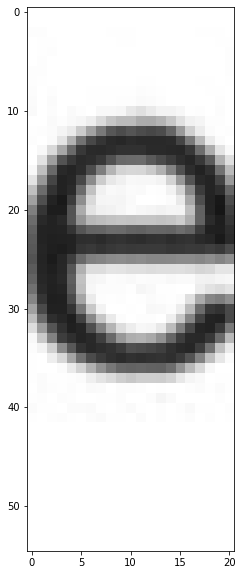

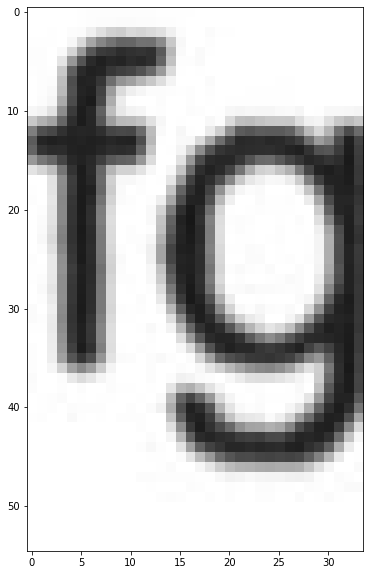

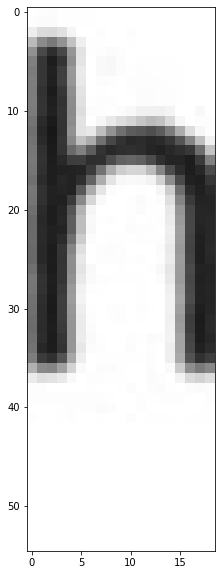

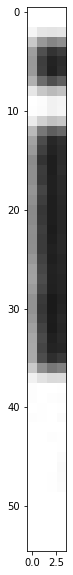

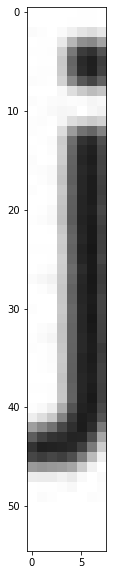

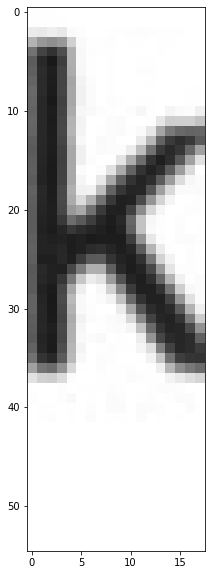

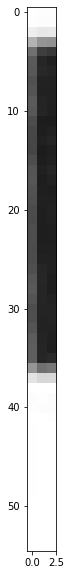

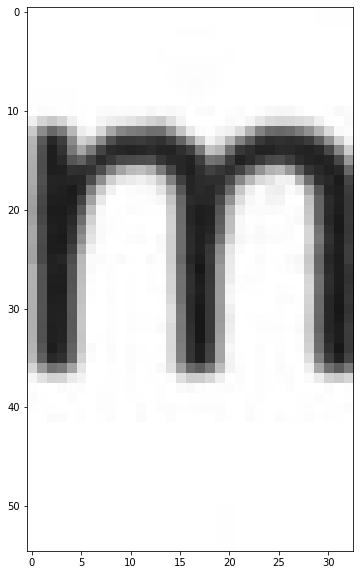

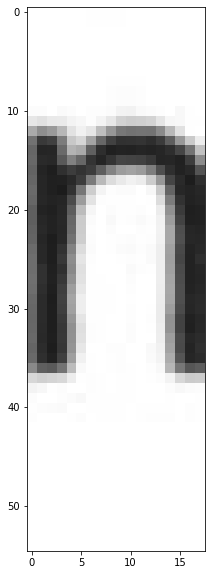

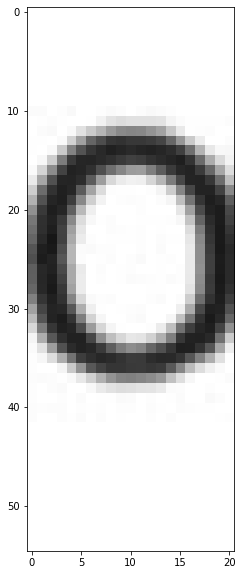

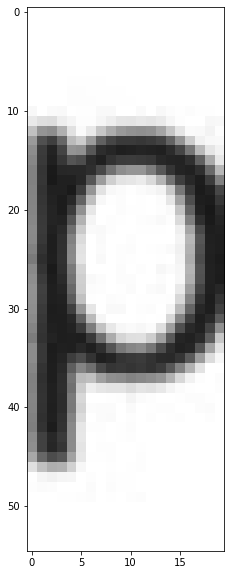

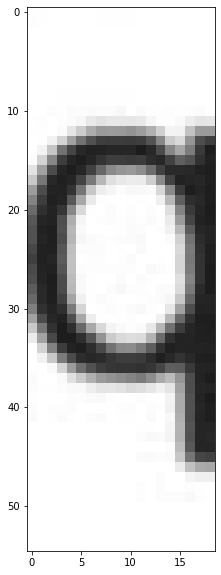

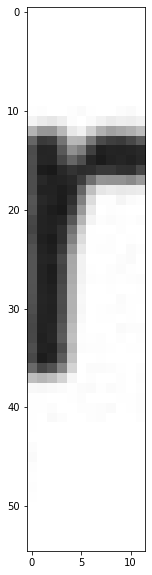

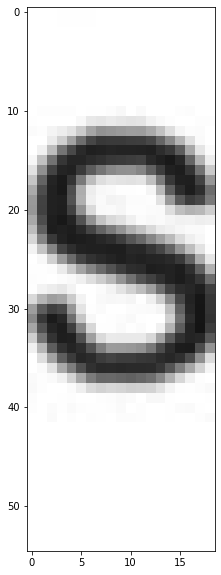

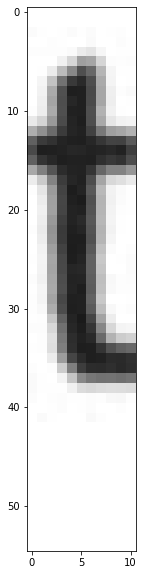

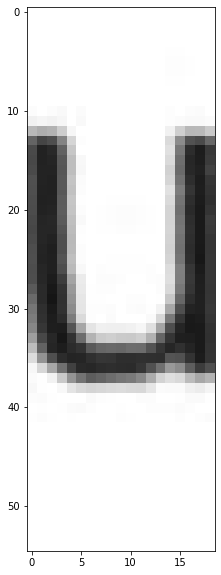

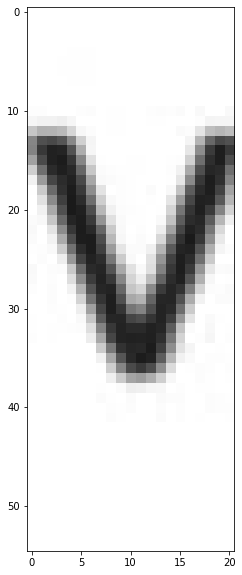

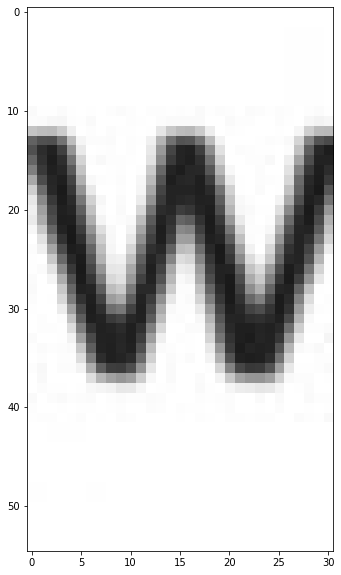

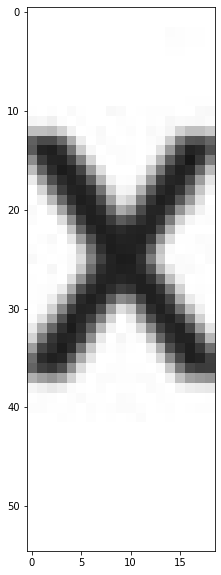

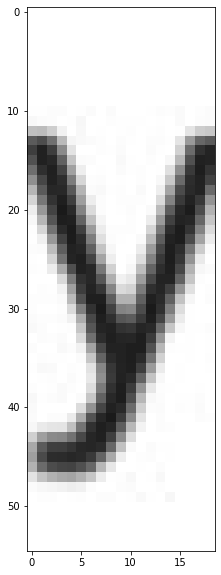

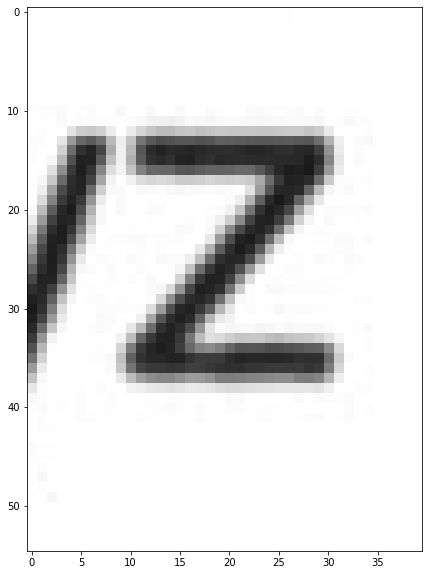

In [92]:
indices_debut_fin_ligne = indices_lignes[1]

ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

for elt in ranges :
    plt.figure(figsize=(20,10))
    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]])
    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes


image = cv2.imread('scan_niv_gris_300ppp_fiche_polices.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


indices_lignes = separe_en_lignes(image_binary)
indices_debut_fin_ligne = indices_lignes[1]


ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)


output_dir = "C:\Users\Hugo Noel\P2I8\OCR-to-Braille\Alphabet_hugo"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Liste des lettres de l'alphabet
alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')


# Enregistrer chaque caractère
i = 0
for elt in ranges:
    plt.figure(figsize=(20, 10))
    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]], cmap='gray')
    plt.axis('off')  # Supprimer les axes
    filename = os.path.join(output_dir, f'{alphabet[i]}.png')
    i += 1
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  # Fermer la figure pour libérer la mémoire


### Evolution du +-3

In [61]:
print(indices)

[281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514,

In [75]:
d = np.diff(indices)
print(d)
print(len(d), len(indices))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 5 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 1 1 1 1 1 1 

In [76]:
espaces =[int(val/2) for val in d if val > 1]
print(espaces)
print(len(espaces))

[2, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 1, 1, 2, 1]
25


In [81]:
ranges = []
start = indices[0]
indices_espaces = 0
for i in range(1, len(indices)):
    if indices[i] != indices[i - 1] + 1:
        if indices_espaces >= 1 :
            val_avant = espaces[indices_espaces-1] 
        else :
            val_avant = espaces[indices_espaces]
        val_apres = espaces[indices_espaces]
        ranges.append((start-val_avant, indices[i - 1]+val_apres))
        start = indices[i]
        indices_espaces += 1
ranges.append((start-val_avant, indices[-1]+val_avant))

print(ranges)

[(279, 312), (312, 341), (341, 374), (374, 407), (407, 437), (437, 465), (465, 500), (501, 533), (533, 544), (545, 568), (569, 599), (600, 625), (625, 661), (662, 694), (695, 731), (731, 761), (762, 797), (797, 830), (830, 860), (860, 889), (890, 920), (920, 951), (952, 995), (996, 1025), (1025, 1054), (1054, 1083)]


In [82]:
ranges = []
start = indices[0]
for i in range(1, len(indices)):
    if indices[i] != indices[i - 1] + 1:
        ranges.append((start, indices[i - 1]))
        start = indices[i]
ranges.append((start, indices[-1]))

print(ranges)

[(281, 310), (314, 338), (344, 371), (377, 404), (410, 434), (440, 462), (468, 497), (504, 529), (537, 542), (547, 565), (572, 597), (602, 622), (628, 658), (665, 691), (698, 728), (734, 759), (764, 794), (800, 827), (833, 858), (862, 887), (892, 917), (923, 950), (953, 994), (997, 1023), (1027, 1053), (1056, 1081)]
